### Dependencies

In [13]:
import pickle
import numpy as np

from matplotlib import pyplot as plt
from kalmanutils import interpolate_geometries, align_vertices

def calculate_rms(geom1, geom2):
    xy1, xy2 = interpolate_geometries([geom1, geom2], vertex_count=100)
    xy1, xy2 = align_vertices([xy1, xy2])
    return np.sqrt(np.sum((xy1[:,0] - xy2[:,0])**2 + (xy1[:,1] - xy2[:,1])**2)/xy1.shape[0])
    

def calculate_area_diff(geom1, geom2):
    return (geom1.union(geom2) - geom1.intersection(geom2)).area

def plot_geometry(geom, ax, **kwargs):
    if isinstance(geom, MultiPolygon):
        for g in geom.geoms:
            x,y = g.exterior.coords.xy
            ax.plot(x,y, **kwargs)
    else:
        x,y = geom.exterior.coords.xy
        ax.plot(x,y, **kwargs)
        
def plot_matrix(X, ax, show_stdev = False, **kwargs):
    vcounts = X.shape[0]//2
    
    color = (1,0,0,0.9)
    if 'color' in kwargs:
        color = kwargs['color']
        
    X_std = np.std(X, axis=1)
    X_mean = np.mean(X, axis=1)
    ax.plot(X_mean[::2], X_mean[1::2], **kwargs)

    # Calculate standard deviation of the generated coordinates
    x0, y0 = X_mean[::2], X_mean[1::2]
    radstd = np.zeros_like(x0)
    
    for vix in range(vcounts):
        x,y = X[2*vix,:], X[2*vix+1,:]
        radius = np.sqrt((x-x0[vix])**2 +(y-y0[vix])**2)
        radstd[vix] = np.std(radius)
    
    if show_stdev:
        for vix in range(vcounts):
            circle = plt.Circle((x0[vix], y0[vix]), radius=radstd[vix], fill=False, edgecolor=(0,0,0,0.4), lw=0.3)
            ax.add_artist(circle)


with open('/home/jovyan/data/output_05142023.pkl', 'rb') as f:
    data = pickle.load(f)
    

In [14]:
gdfignition = data['gdfignition']
gdfignition['objectid'] = gdfignition['objectid'].astype(str)

In [15]:
gdfreference = gdfignition[gdfignition['objectid']=='21231_RefTruth']
gdfdeviate = gdfignition[gdfignition['objectid']=='21231_Deviate']
gdfupdate = gdfignition[gdfignition['objectid'].str.contains('Update')]

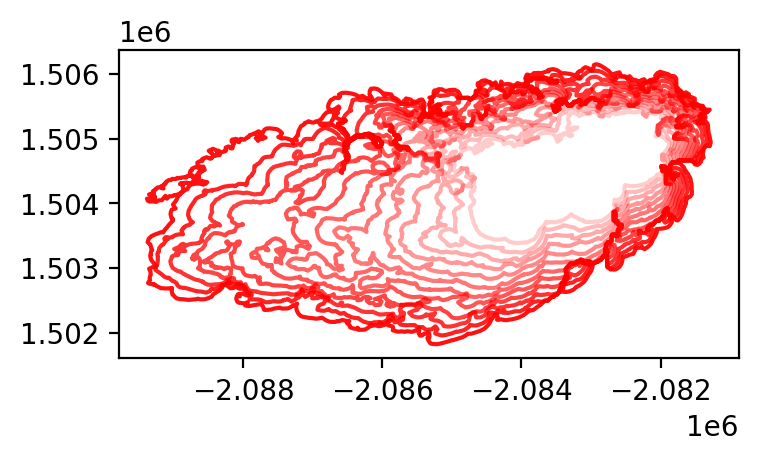

In [16]:
fig, ax = plt.subplots(1,1, figsize=(4,2), dpi=200)

for i, (gdfix, gdfrefrow) in enumerate(gdfreference.iterrows()):
    x,y = gdfrefrow['geometry'].exterior.coords.xy
    ax.plot(x, y, color=(1,0,0,1/5+i/5*4/len(gdfreference)))

In [17]:
gdfreference.iloc[1:len(gdfupdate)+1]

,filetype,objectid,filepath,datetime,description,geometry
68b265e5ba78410d9ba23e595c4ebe4d,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00001/out_Perim...,2019-10-31 20:37:11,Maria2019,"POLYGON ((-2085015.000 1504756.000, -2085025.0..."
aab698d3dcdb40c5a200fa962062eac6,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00002/out_Perim...,2019-10-31 21:07:11,Maria2019,"POLYGON ((-2085197.000 1504021.000, -2085201.0..."
898b0f9313d44e70bfe3fd53a269981f,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00003/out_Perim...,2019-10-31 21:37:11,Maria2019,"POLYGON ((-2085149.000 1504474.000, -2085139.0..."
f812b5bd6b9841c7a9d3c049f2ef65d0,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00004/out_Perim...,2019-10-31 22:07:11,Maria2019,"POLYGON ((-2085749.000 1504157.000, -2085717.0..."
1902f9bb87654d6596616ce39baa5bd4,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00005/out_Perim...,2019-10-31 22:37:11,Maria2019,"POLYGON ((-2085846.000 1504355.000, -2085870.0..."
8a431825f5ed4c80a5c8bbe6272aae75,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00006/out_Perim...,2019-10-31 23:07:11,Maria2019,"POLYGON ((-2085917.000 1504477.000, -2085917.0..."
eaf6ac2e01c14ee6a7575004cc255470,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00007/out_Perim...,2019-10-31 23:37:11,Maria2019,"POLYGON ((-2087673.000 1503303.000, -2087676.0..."
2a2d3f9489a34a5ebe7acb1842be28b9,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00008/out_Perim...,2019-11-01 00:07:11,Maria2019,"POLYGON ((-2088382.000 1503008.000, -2088380.0..."
a966c3e028054453ae6ae791bdbb2eaa,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00009/out_Perim...,2019-11-01 00:37:11,Maria2019,"POLYGON ((-2088359.000 1503673.000, -2088332.0..."
4589feb89833462392177adc46d432b2,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00010/out_Perim...,2019-11-01 01:07:11,Maria2019,"POLYGON ((-2088857.000 1503620.000, -2088822.0..."


Text(0.5, 1.0, 'Errors without Kalman Filters')

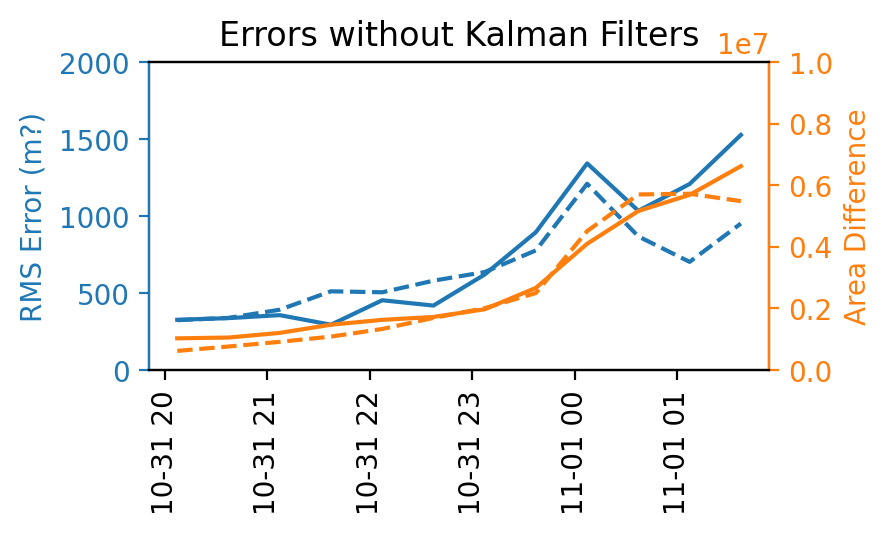

In [22]:
errors_rms = []
errors_areadiff = []
for (geom1, geom2) in zip(gdfreference['geometry'].tolist(), gdfdeviate['geometry'].tolist()):
    errors_rms.append(calculate_rms(geom1, geom2))
    errors_areadiff.append(calculate_area_diff(geom1, geom2))

errors_rms_update = []
errors_areadiff_update = []
for (geom1, geom2) in zip(gdfreference['geometry'].tolist(), gdfupdate['geometry'].tolist()):
    errors_rms_update.append(calculate_rms(geom1, geom2))
    errors_areadiff_update.append(calculate_area_diff(geom1, geom2))

    
fig, ax = plt.subplots(1,1, figsize=(4,2), dpi=200)
ax2 = ax.twinx()

ax.plot(gdfreference['datetime'], errors_rms, color='tab:blue')
ax.plot(gdfupdate['datetime'], errors_rms_update, color='tab:blue', ls='--')
ax.set_ylim(0,2000)
ax.set_ylabel('RMS Error (m?)', color='tab:blue')
ax.tick_params(axis='y', colors='tab:blue')
ax2.spines['left'].set_color('tab:blue')

ax2.plot(gdfreference['datetime'], errors_areadiff, color='tab:orange')
ax2.plot(gdfupdate['datetime'], errors_areadiff_update, color='tab:orange', ls='--')
ax2.set_ylim(0,1e7)
ax2.set_ylabel('Area Difference', color='tab:orange')
ax2.tick_params(axis='y', colors='tab:orange')
ax2.spines['right'].set_color('tab:orange')
# ax2.yaxis.set_ticklabels(ax2.yaxis.get_ticklabels(), color='tab:orange')


ax.xaxis.set_tick_params(rotation=90)

ax.set_title('Errors without Kalman Filters')


In [21]:
gdfreference

,filetype,objectid,filepath,datetime,description,geometry
51fdaebe31f44ad69272779a3f01182d,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00000/out_Perim...,2019-10-31 20:07:11,Maria2019,"POLYGON ((-2084574.000 1504835.000, -2084554.0..."
68b265e5ba78410d9ba23e595c4ebe4d,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00001/out_Perim...,2019-10-31 20:37:11,Maria2019,"POLYGON ((-2085015.000 1504756.000, -2085025.0..."
aab698d3dcdb40c5a200fa962062eac6,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00002/out_Perim...,2019-10-31 21:07:11,Maria2019,"POLYGON ((-2085197.000 1504021.000, -2085201.0..."
898b0f9313d44e70bfe3fd53a269981f,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00003/out_Perim...,2019-10-31 21:37:11,Maria2019,"POLYGON ((-2085149.000 1504474.000, -2085139.0..."
f812b5bd6b9841c7a9d3c049f2ef65d0,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00004/out_Perim...,2019-10-31 22:07:11,Maria2019,"POLYGON ((-2085749.000 1504157.000, -2085717.0..."
1902f9bb87654d6596616ce39baa5bd4,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00005/out_Perim...,2019-10-31 22:37:11,Maria2019,"POLYGON ((-2085846.000 1504355.000, -2085870.0..."
8a431825f5ed4c80a5c8bbe6272aae75,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00006/out_Perim...,2019-10-31 23:07:11,Maria2019,"POLYGON ((-2085917.000 1504477.000, -2085917.0..."
eaf6ac2e01c14ee6a7575004cc255470,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00007/out_Perim...,2019-10-31 23:37:11,Maria2019,"POLYGON ((-2087673.000 1503303.000, -2087676.0..."
2a2d3f9489a34a5ebe7acb1842be28b9,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00008/out_Perim...,2019-11-01 00:07:11,Maria2019,"POLYGON ((-2088382.000 1503008.000, -2088380.0..."
a966c3e028054453ae6ae791bdbb2eaa,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00009/out_Perim...,2019-11-01 00:37:11,Maria2019,"POLYGON ((-2088359.000 1503673.000, -2088332.0..."


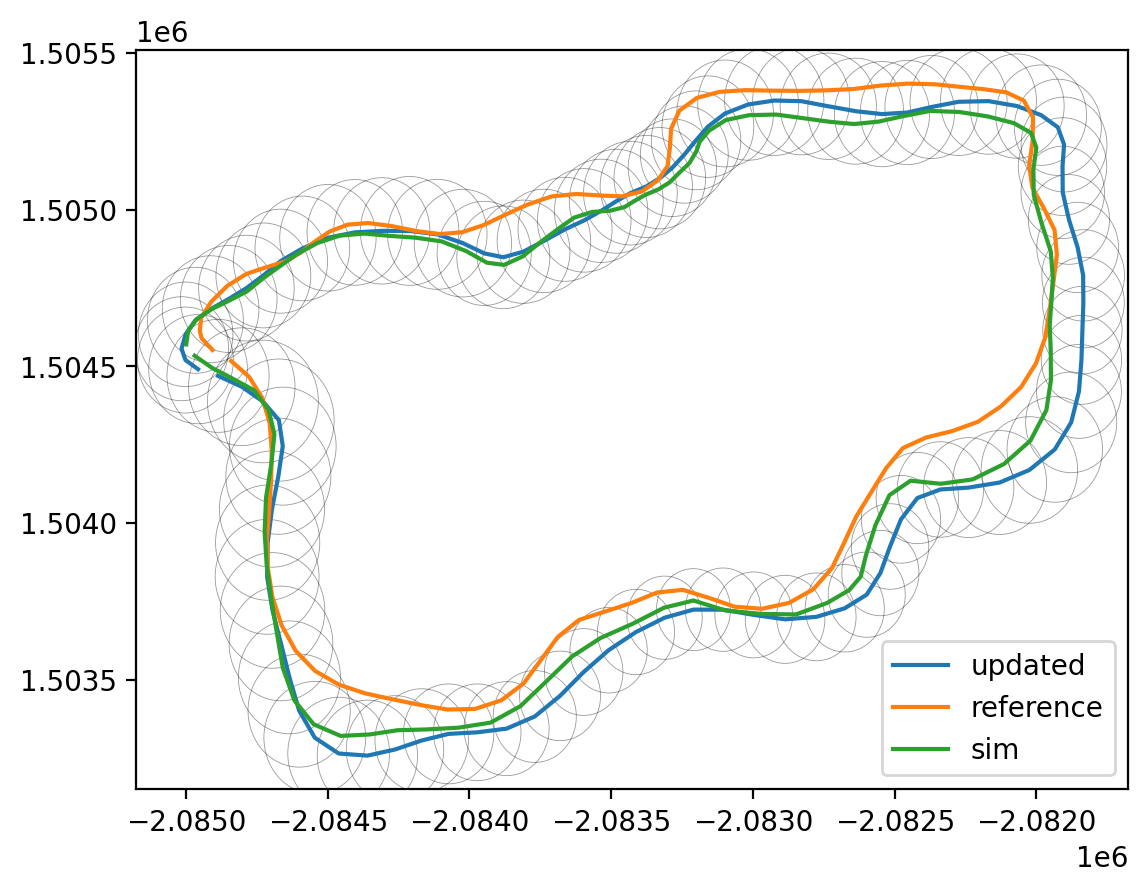

In [7]:
fig, ax = plt.subplots(1,1, dpi=200)
plotix = 0
plot_matrix(data['calculations'][plotix]['X'][:-2,:], ax=ax, label='updated', show_stdev=True)
plot_matrix(data['calculations'][plotix]['Y'], ax=ax, label='reference')
plot_matrix(data['calculations'][plotix]['Xt'][:-2,:], ax=ax, label='sim')
ax.legend()
